In [1]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention, did_map
from scipy.stats import shapiro, yeojohnson, kruskal
import scikit_posthocs as sp
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [2]:
def get_pvalue(x):
    return round(shapiro(x).pvalue, 5)

In [3]:
page_id = '8'
password_response, time_response, survey_response, dids = get_responses()
questions = get_questions()

Total: 163; 
Attentive: 131; Non Attentive: 32


In [4]:
survey_response_df = pd.DataFrame(survey_response)

csquest = pd.json_normalize(survey_response_df[page_id])
csquest.drop(attention.get(page_id).keys(), axis=1, inplace=True)

qualindex = ['8-1', '10-1', '11-1']
csquestqual = csquest[qualindex]
# csquestqual.to_csv('qualitative/csquest_qual.csv')
csquestqual

csquestquant = csquest.drop(qualindex, axis=1).fillna(4).astype(float)

# normalize scale 1 to 8 to scale -3 to 3
normcsquestquant = csquestquant - 4
csquestquant.update(normcsquestquant)

new_columns = {}
for qsid in csquestquant.columns:
    new_columns[qsid] = json.loads(get_qdetails(page_id, qsid).split('\n')[1].replace("'", '"')).get('keyword')
csquestquant.rename(columns=new_columns, inplace=True)

In [5]:
csquestqual.head(2)
csquestqual['did'] = dids
csquestqual['design'] = csquestqual['did'].apply(lambda x: get_design(x))
csquestqual.drop('did', axis=1, inplace=True)
csquestqual
# csquestqual.to_csv('data/qualitative/csquest_qual.csv', index=False)

<ipython-input-5-9b69fd5c41ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csquestqual['did'] = dids
<ipython-input-5-9b69fd5c41ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csquestqual['design'] = csquestqual['did'].apply(lambda x: get_design(x))
/Users/rizu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,8-1,10-1,11-1,design
0,"[Social Media, Financial Websites, Course Mana...",Thinking about my info being hacked into,That if I have an insecure password my identit...,Metaphor
1,[None of the above],"I guess the last panel, which shows how easy i...",NaN,Personal
2,"[Social Media, Email, Financial Websites, Cour...",The possibility of it showing a threat by only...,NaN,Consequences
3,"[Social Media, Email]",THE LAST PART IS REALLT MOTIVATES TO MAKE A ST...,NaN,Consequences
4,"[Social Media, Financial Websites, E-commerce ...",81% of data breaches in 2020 happened due to w...,NaN,Logos
...,...,...,...,...
126,"[Financial Websites, E-commerce Websites, Gove...",The statistics stating the actual numbers of p...,NaN,Logos
127,"[Email, Financial Websites, E-commerce Website...",The hacker's screen saying attack successful a...,NaN,Consequences
128,"[Social Media, Email, Financial Websites, Gove...",The second part motives me most to create a st...,NaN,Professional
129,"[Social Media, Financial Websites, E-commerce ...",where it show that 4 out of 10 people use weak...,NaN,Logos


In [6]:
csquestquant['did'] = dids
csquestquant['design'] = csquestquant['did'].apply(lambda x: get_design(x))
csquestquant.drop('did', axis=1, inplace=True)
did_csquestquant = csquestquant.groupby('design').mean()
display(csquestquant.head())
display(csquestquant.describe())

,Portrayal of hacker stimulates,Portrayal of victim encourages,Makes me worried,Encouragement for strong password,Emotional Connection,Personal Connection,Easy to follow,Novel,Attractive,Informative,Easy to understand,To the Point,Creative,Well Organized,Engaging,Real life motivation,design
0,1.0,2.0,-1.0,-1.0,-3.0,-3.0,-2.0,1.0,-2.0,0.0,-3.0,-3.0,2.0,-3.0,0.0,-2.0,Metaphor
1,-3.0,1.0,-3.0,0.0,-3.0,-3.0,3.0,-3.0,-3.0,1.0,2.0,1.0,0.0,2.0,-3.0,-3.0,Personal
2,1.0,1.0,2.0,2.0,-1.0,-2.0,3.0,-3.0,1.0,2.0,3.0,3.0,-2.0,3.0,0.0,2.0,Consequences
3,2.0,0.0,1.0,3.0,1.0,2.0,1.0,0.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,Consequences
4,0.0,0.0,-3.0,2.0,1.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,Logos


,Portrayal of hacker stimulates,Portrayal of victim encourages,Makes me worried,Encouragement for strong password,Emotional Connection,Personal Connection,Easy to follow,Novel,Attractive,Informative,Easy to understand,To the Point,Creative,Well Organized,Engaging,Real life motivation
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,1.022901,1.015267,0.427481,1.610687,0.694656,0.732824,1.671756,0.839695,1.152672,1.526718,1.839695,1.595420,1.244275,1.564885,1.312977,1.503817
std,1.464795,1.358646,1.727740,1.389923,1.818254,1.708911,1.315252,1.450818,1.511358,1.464074,1.396792,1.423855,1.430931,1.359294,1.347841,1.531083
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.500000,3.000000,3.000000,2.000000,2.500000,2.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


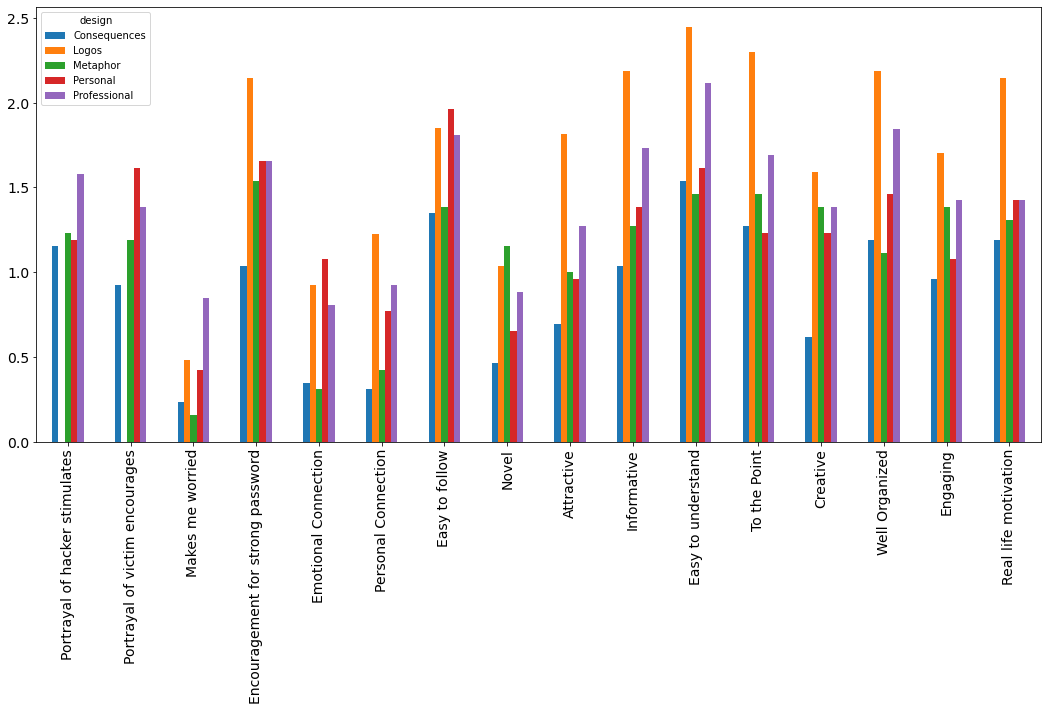

In [7]:
chart = did_csquestquant.T.plot.bar(figsize=(18, 8), fontsize=14, style=".-")

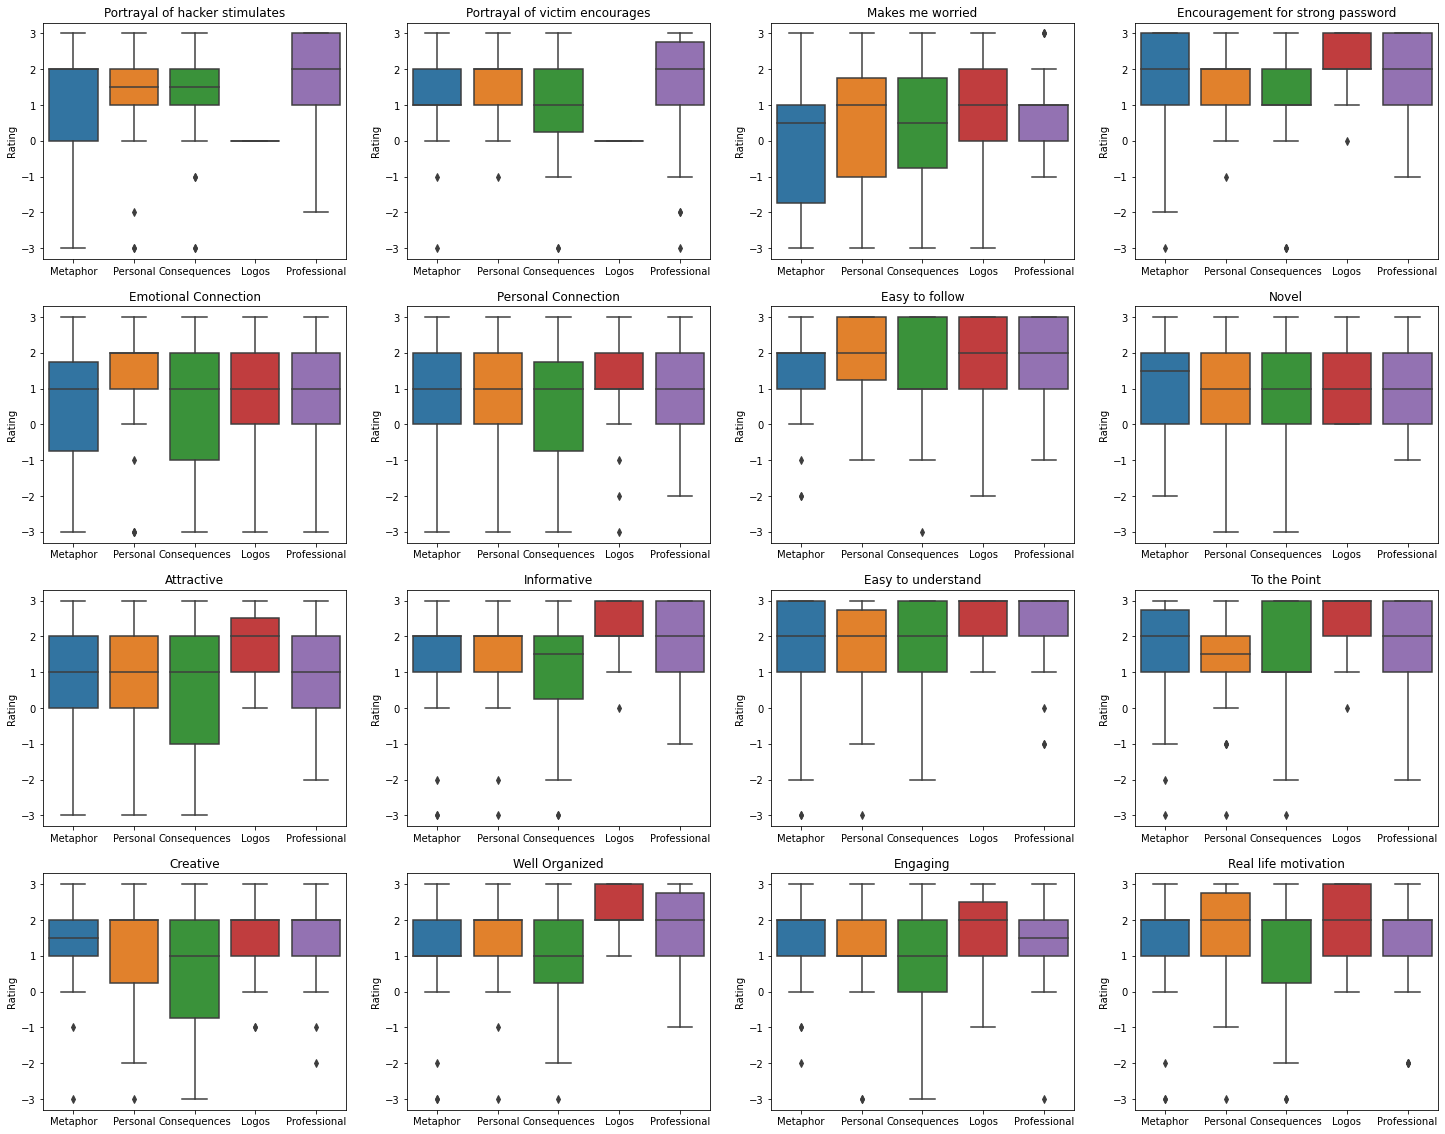

In [8]:
csquestquant
fig, axes = plt.subplots(4, 4, figsize=(25, 20))
k = 0
for i in range(4):
    for j in range(4):
        sns.boxplot(data=csquestquant, x='design', y=csquestquant.columns[k], ax=axes[i][j])
        # sns.swarmplot(data=csquestquant, x='design', y=csquestquant.columns[i+j], ax=axes[i][j])
        axes[i][j].set_ylabel('Rating')
        axes[i][j].set_xlabel('')
        axes[i][j].set_title(csquestquant.columns[k])
        k += 1

In [9]:
# for design in did_map.values():
#     fig, axes = plt.subplots(4, 4, figsize=(25, 20))
#     k = 0
#     for i in range(4):
#         for j in range(4):
#             fdata = csquestquant[csquestquant['design']==design]
#             sns.histplot(data=fdata, x=csquestquant.columns[k], kde=True, ax=axes[i][j])
#             axes[i][j].set_ylabel('Rating')
#             axes[i][j].set_xlabel('')
#             axes[i][j].set_title(csquestquant.columns[k] )
#             axes[i][j].set_title(f'{csquestquant.columns[k]} -- p-value: {get_pvalue(fdata[csquestquant.columns[k]])}')
#             k += 1
#     fig.suptitle(f'{design}')

In [10]:
test = {}
designs = []
quests = csquestquant.columns.to_list()
quests.remove('design')
for i, param in enumerate(quests):
    test[param] = []
    for design in did_map.values():
        test[param].append(csquestquant[csquestquant['design']==design][param].to_list())
        designs.append(design) if i<=0 else None

# Performing kruskal test
for k, v in test.items():
    print(f'{k}: {kruskal(*v)}')

Portrayal of hacker stimulates: KruskalResult(statistic=30.657402454816708, pvalue=3.59568207315946e-06)
Portrayal of victim encourages: KruskalResult(statistic=39.0281542108956, pvalue=6.873785525125395e-08)
Makes me worried: KruskalResult(statistic=1.4469372883067793, pvalue=0.8359974380241102)
Encouragement for strong password: KruskalResult(statistic=7.130754876219133, pvalue=0.12913766841897564)
Emotional Connection: KruskalResult(statistic=4.179983696642743, pvalue=0.3821953569391785)
Personal Connection: KruskalResult(statistic=5.202324296206577, pvalue=0.2671605378754371)
Easy to follow: KruskalResult(statistic=4.157075901748621, pvalue=0.38516511832706357)
Novel: KruskalResult(statistic=3.01330942132804, pvalue=0.5556005761787701)
Attractive: KruskalResult(statistic=6.981197768344128, pvalue=0.136885179618206)
Informative: KruskalResult(statistic=9.453195330411226, pvalue=0.05071791455382892)
Easy to understand: KruskalResult(statistic=9.932563147904807, pvalue=0.0415790978908

In [11]:
var = []
temp = test.get('To the Point')
for i in range(0, len(temp)):
    print(kruskal(temp[0], temp[i]))

# Logos, Metaphor, Personal, Professional, Consequences

KruskalResult(statistic=0.0, pvalue=1.0)
KruskalResult(statistic=4.847499424479275, pvalue=0.027686241322455802)
KruskalResult(statistic=9.462521347465046, pvalue=0.002097126147143999)
KruskalResult(statistic=3.1735234215886146, pvalue=0.07484083001522322)
KruskalResult(statistic=6.21354661152453, pvalue=0.012677638839038063)


KruskalResult(statistic=19.658492084786698, pvalue=9.259089941549531e-06)
KruskalResult(statistic=22.556263682802257, pvalue=2.040780532993842e-06)
KruskalResult(statistic=22.603549141965697, pvalue=1.991164355822643e-06)
KruskalResult(statistic=19.75537403267413, pvalue=8.80138630388281e-06)
KruskalResult(statistic=23.585512259639863, pvalue=1.194837483671255e-06)
KruskalResult(statistic=36.3941826923077, pvalue=1.6118358360045116e-09)
KruskalResult(statistic=21.735689841076386, pvalue=3.1291527163905403e-06)
KruskalResult(statistic=18.687751874713058, pvalue=1.5396832891188652e-05)
KruskalResult(statistic=0.0, pvalue=1.0)
KruskalResult(statistic=0.3768784562672678, pvalue=0.5392785864713743)
KruskalResult(statistic=0.0, pvalue=1.0)
KruskalResult(statistic=0.14741024549455242, pvalue=0.701022607766824)
KruskalResult(statistic=0.25816111771238104, pvalue=0.6113863153283252)
KruskalResult(statistic=0.0, pvalue=1.0)
KruskalResult(statistic=1.4809854497354744, pvalue=0.22362040318604814)


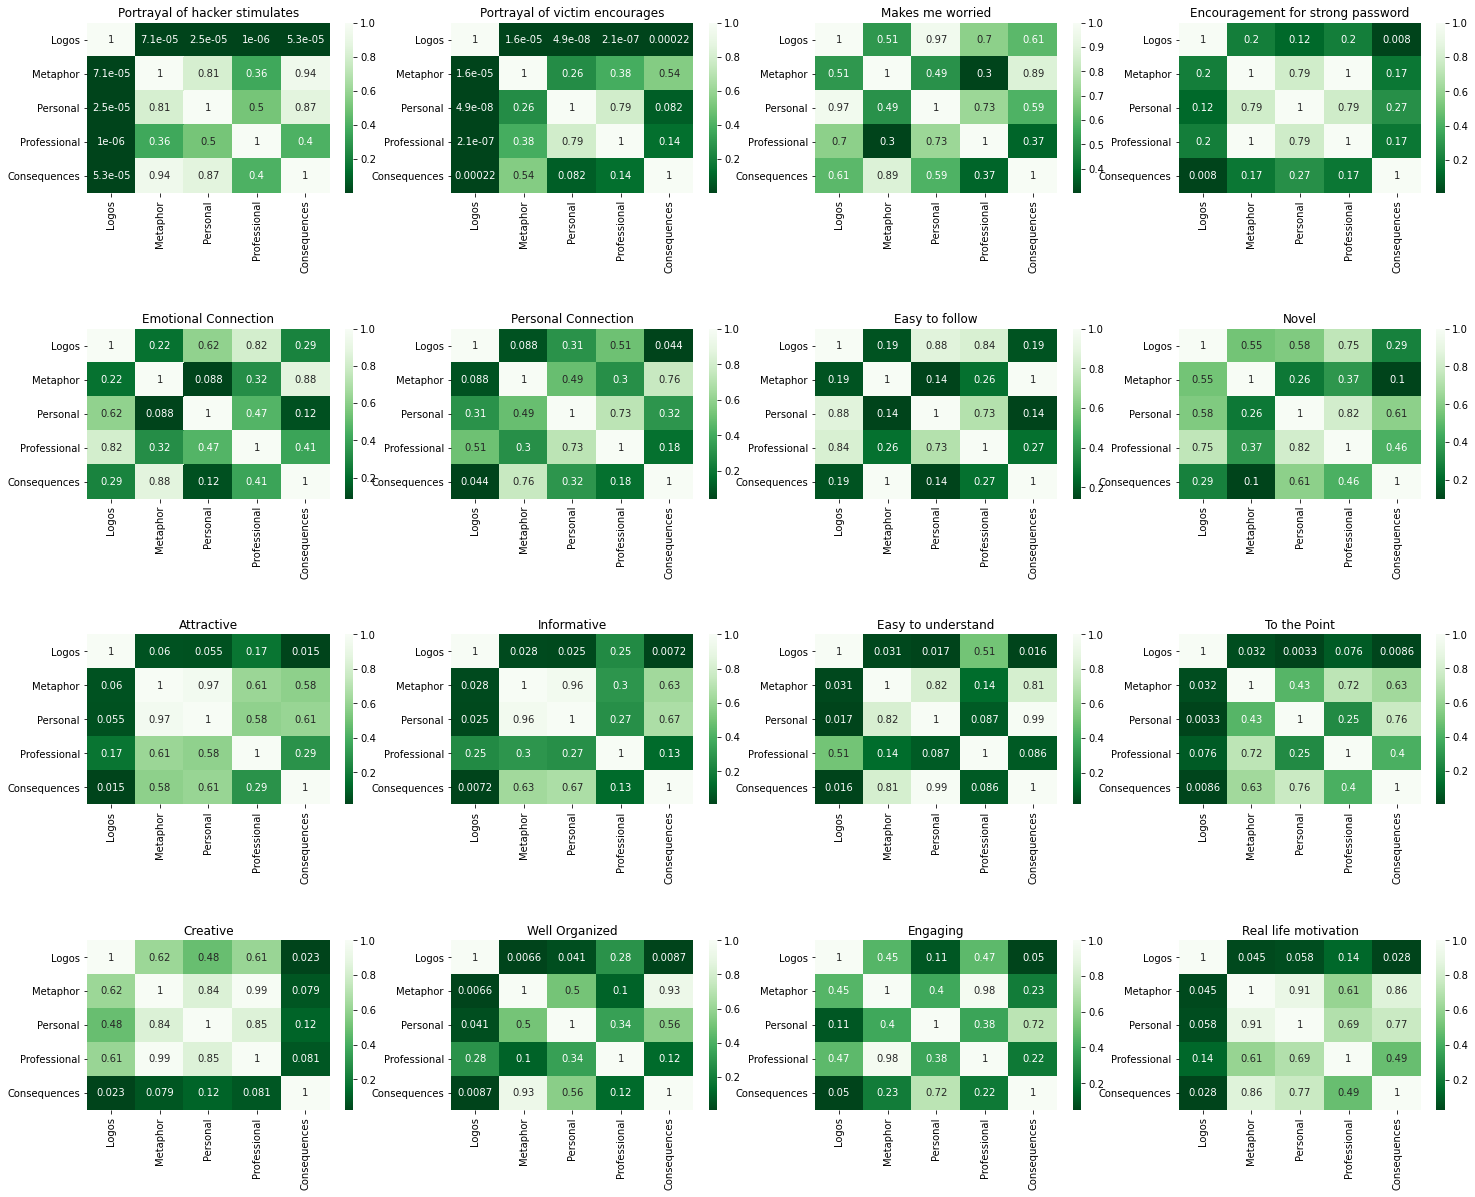

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(25, 20))
fig.subplots_adjust(hspace=0.8)

k=0
for i in range(4):
    for j in range(4):
        data = sp.posthoc_dunn(test[quests[k]])
        data.index = data.index.map(get_design)
        data.columns = data.columns.map(get_design)
        kaka = test[quests[k]]
        # print((test[quests[k]]))
        for m in range(0, len(kaka)):
            try:
                print(kruskal(kaka[0], kaka[m]))
                # print(kruskal(kaka[0], kaka[m])) if i == j == 0 else None

            except:
                pass
        sns.heatmap(data, annot=True, ax=axes[i][j], cmap="Greens_r")
        axes[i][j].set_title(quests[k])
        k += 1

In [13]:
csquestquant

,Portrayal of hacker stimulates,Portrayal of victim encourages,Makes me worried,Encouragement for strong password,Emotional Connection,Personal Connection,Easy to follow,Novel,Attractive,Informative,Easy to understand,To the Point,Creative,Well Organized,Engaging,Real life motivation,design
0,1.0,2.0,-1.0,-1.0,-3.0,-3.0,-2.0,1.0,-2.0,0.0,-3.0,-3.0,2.0,-3.0,0.0,-2.0,Metaphor
1,-3.0,1.0,-3.0,0.0,-3.0,-3.0,3.0,-3.0,-3.0,1.0,2.0,1.0,0.0,2.0,-3.0,-3.0,Personal
2,1.0,1.0,2.0,2.0,-1.0,-2.0,3.0,-3.0,1.0,2.0,3.0,3.0,-2.0,3.0,0.0,2.0,Consequences
3,2.0,0.0,1.0,3.0,1.0,2.0,1.0,0.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,Consequences
4,0.0,0.0,-3.0,2.0,1.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,Logos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.0,0.0,-3.0,0.0,-3.0,-3.0,2.0,0.0,1.0,2.0,3.0,3.0,1.0,2.0,2.0,0.0,Logos
127,2.0,2.0,-3.0,-3.0,-2.0,-3.0,-3.0,0.0,-2.0,-1.0,-2.0,-2.0,-1.0,-1.0,-2.0,3.0,Consequences
128,1.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,Professional
129,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,Logos


<AxesSubplot:>

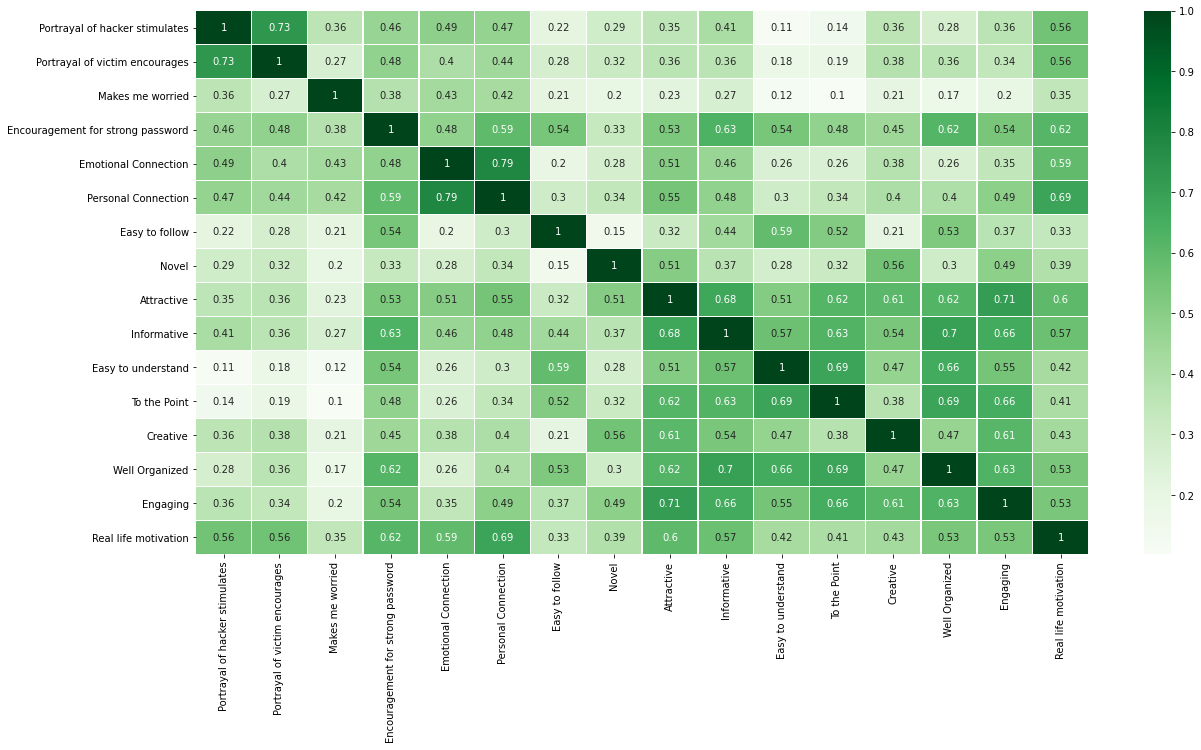

In [14]:
cormat = csquestquant.corr(method='pearson')

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(cormat, annot=True, cmap="Greens", linewidths=.5, ax=ax)

In [15]:
# for design in did_map.values():
#     cormat = csquestquant[csquestquant['design']==design].corr(method='pearson')
#     fig, ax = plt.subplots(figsize=(20, 10))
#     sns.heatmap(cormat, annot=True, cmap="Greens", linewidths=.5, ax=ax)
#     fig.suptitle(design)

### For which type of website would you like to see this design

In [16]:
# new_columns = {}
# for qsid in csquestqual.columns:
#     new_columns[qsid] = json.loads(get_qdetails(page_id, qsid).split('\n')[1].replace("'", '"')).get('keyword')
# csquestqual.rename(columns=new_columns, inplace=True)
# csquestqual['did'] = dids
# csquestqual['design'] = csquestqual['did'].apply(lambda x: get_design(x))
# csquestqual.drop('did', axis=1, inplace=True)
# csquestqual

new_columns = {}
print(csquestqual.columns)
for qsid in csquestqual.columns:
    if (qsid != 'design'):
        new_columns[qsid] = json.loads(get_qdetails(page_id, qsid).split('\n')[1].replace("'", '"')).get('keyword')

csquestqual.rename(columns=new_columns, inplace=True)
# csquestqual['did'] = dids
# csquestqual['design'] = csquestqual['did'].apply(lambda x: get_design(x))
# csquestqual.drop('did', axis=1, inplace=True)
csquestqual

Index(['8-1', '10-1', '11-1', 'design'], dtype='object')


/Users/rizu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Account creation page,Motivating parts,Metaphor meaning,design
0,"[Social Media, Financial Websites, Course Mana...",Thinking about my info being hacked into,That if I have an insecure password my identit...,Metaphor
1,[None of the above],"I guess the last panel, which shows how easy i...",NaN,Personal
2,"[Social Media, Email, Financial Websites, Cour...",The possibility of it showing a threat by only...,NaN,Consequences
3,"[Social Media, Email]",THE LAST PART IS REALLT MOTIVATES TO MAKE A ST...,NaN,Consequences
4,"[Social Media, Financial Websites, E-commerce ...",81% of data breaches in 2020 happened due to w...,NaN,Logos
...,...,...,...,...
126,"[Financial Websites, E-commerce Websites, Gove...",The statistics stating the actual numbers of p...,NaN,Logos
127,"[Email, Financial Websites, E-commerce Website...",The hacker's screen saying attack successful a...,NaN,Consequences
128,"[Social Media, Email, Financial Websites, Gove...",The second part motives me most to create a st...,NaN,Professional
129,"[Social Media, Financial Websites, E-commerce ...",where it show that 4 out of 10 people use weak...,NaN,Logos


In [17]:
account_creation = csquestqual.copy()
account_creation.drop(['Motivating parts', 'Metaphor meaning'], axis=1, inplace=True)
account_creation

,Account creation page,design
0,"[Social Media, Financial Websites, Course Mana...",Metaphor
1,[None of the above],Personal
2,"[Social Media, Email, Financial Websites, Cour...",Consequences
3,"[Social Media, Email]",Consequences
4,"[Social Media, Financial Websites, E-commerce ...",Logos
...,...,...
126,"[Financial Websites, E-commerce Websites, Gove...",Logos
127,"[Email, Financial Websites, E-commerce Website...",Consequences
128,"[Social Media, Email, Financial Websites, Gove...",Professional
129,"[Social Media, Financial Websites, E-commerce ...",Logos


#### Top 3 websites type

In [18]:
design_ac = account_creation.explode('Account creation page').groupby(['design']).apply(lambda grp: grp.groupby('Account creation page')['design'].count().to_dict()).to_dict()
design_ac_df = pd.DataFrame(design_ac).T
print(design_ac_df.sum().sort_values(ascending=True))
design_ac_df.T

None of the above                                                       10.0
Content Websites, e.g. Audio/Video Streaming, Online Newspaper, etc.    28.0
Course Management Websites, e.g. Canvas, Blackboard, etc.               32.0
Gaming Websites                                                         42.0
Government Websites                                                     44.0
E-commerce Websites                                                     67.0
Financial Websites                                                      75.0
Email                                                                   77.0
Social Media                                                            92.0
dtype: float64


,Consequences,Logos,Metaphor,Personal,Professional
"Content Websites, e.g. Audio/Video Streaming, Online Newspaper, etc.",4.0,10.0,4.0,5.0,5.0
"Course Management Websites, e.g. Canvas, Blackboard, etc.",8.0,7.0,4.0,4.0,9.0
E-commerce Websites,14.0,19.0,10.0,12.0,12.0
Email,19.0,14.0,13.0,14.0,17.0
Financial Websites,16.0,22.0,10.0,13.0,14.0
Gaming Websites,9.0,8.0,9.0,7.0,9.0
Government Websites,8.0,15.0,5.0,8.0,8.0
None of the above,2.0,NaN,2.0,3.0,3.0
Social Media,15.0,20.0,21.0,16.0,20.0


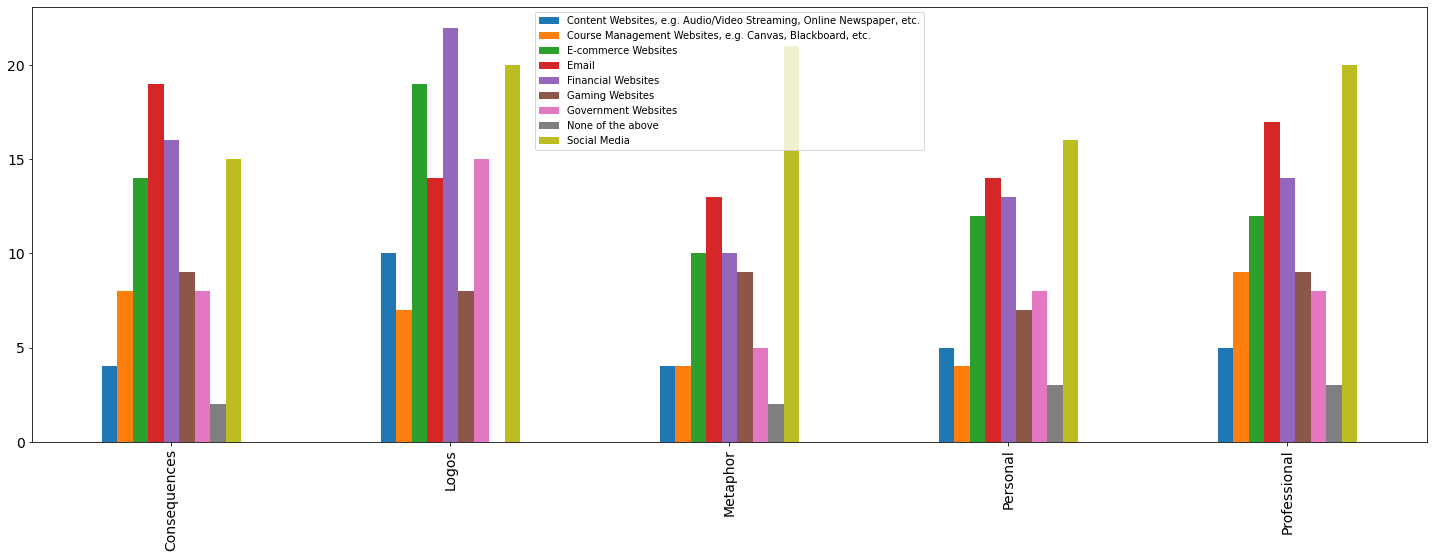

In [19]:
_ = design_ac_df.plot.bar(figsize=(25, 8), fontsize=14, style=".-")

In [20]:
temp = design_ac_df.copy()
one = ["Social Media", "Email", "Financial Websites"]
temp.drop('None of the above', axis=1, inplace=True)
one_design = temp[one].sum(axis=1)
zero_design = temp.drop(one, axis=1).sum(axis=1)
display(one_design, zero_design)

Consequences    50.0
Logos           56.0
Metaphor        44.0
Personal        43.0
Professional    51.0
dtype: float64

Consequences    43.0
Logos           59.0
Metaphor        32.0
Personal        36.0
Professional    43.0
dtype: float64

In [21]:
one_design.sum(), zero_design.sum()

(244.0, 213.0)

In [22]:
data=design_ac_df.sum()
# sns.barplot(data.values, data.index)